In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import random

import matplotlib.pyplot as plt

%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
df = pd.read_csv(
    'ceneval_mentor_v3.csv',
    encoding='utf-8',
    low_memory=False,
    index_col=0
)

In [16]:
def get_random_params():
    return {
        "n_estimators": random.choice(range(10, 1000, 1)),
        "max_features": random.choice(range(50, 100, 5)) / 100,
        "max_depth": random.choice(list(range(1, 100, 1)) + [None]),
        "criterion": random.choice(['gini','entropy']),
        "n_jobs": -1
    }



In [17]:
params = [get_random_params() for i in range(1000)]

In [18]:
def get_accuracy(df, params):
    #print("Getting accuracy for:" + str(params))
    x=df.drop(["DICTAMEN"], axis=1).values  
    y=df['DICTAMEN']  
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    clf=RandomForestClassifier(**params)
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    return metrics.accuracy_score(y_test, y_pred)

In [19]:
results = [{"accuracy": get_accuracy(df, param), **param}  for param in params]

In [20]:
result_df = pd.DataFrame(results)
result_df.to_csv('results_iterations_1000.csv')
result_df

,accuracy,n_estimators,max_features,max_depth,criterion,n_jobs
0,0.709436,823,0.75,98.0,entropy,-1
1,0.710931,980,0.55,45.0,entropy,-1
2,0.704953,543,0.75,96.0,entropy,-1
3,0.711998,654,0.90,99.0,entropy,-1
4,0.707728,613,0.60,71.0,gini,-1
...,...,...,...,...,...,...
995,0.704099,416,0.95,41.0,gini,-1
996,0.699616,284,0.85,23.0,gini,-1
997,0.707728,949,0.60,54.0,gini,-1
998,0.702391,527,0.55,72.0,entropy,-1


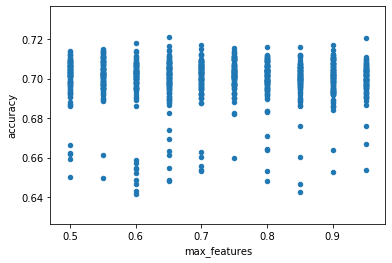

In [21]:
result_df.plot.scatter(x="max_features", y="accuracy")

In [22]:
result_df.accuracy.max()

0.7211784799316823

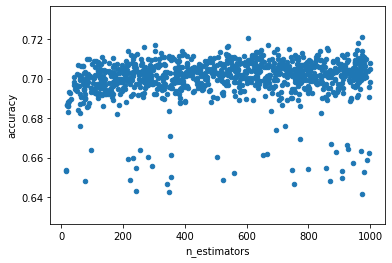

In [25]:
result_df.plot.scatter(x="n_estimators", y="accuracy")